In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from pyEulerCurves import ECC_from_pointcloud, plot_euler_curve

## Sample points from the unit circle

In [3]:
point_cloud = []

NUMBER_OF_POINTS = 100

random.seed(42)
for i in range(NUMBER_OF_POINTS):
    angle = random.uniform(0,2*np.pi)
    point_cloud.append([np.cos(angle), np.sin(angle)])
    
point_cloud = np.array(point_cloud)

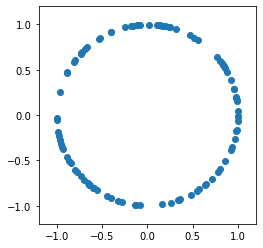

In [4]:
plt.figure()
plt.axis('scaled')
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))
plt.scatter(point_cloud[:,0], point_cloud[:,1])
plt.show()

In [5]:
trans = ECC_from_pointcloud(epsilon=0.8, # max filtration
                            workers=2    # number of CPU cores
                           )

In [6]:
%%time
ecc = trans.fit_transform(point_cloud)

CPU times: user 73.7 ms, sys: 35.2 ms, total: 109 ms
Wall time: 13 s


In [7]:
trans.number_of_simplices

5838976

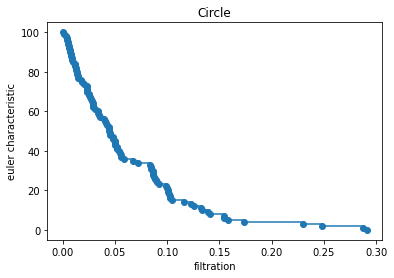

In [8]:
plot_euler_curve(ecc, with_lines=True, title='Circle')